# Clusterização

A clusterização é a necessidade de classificação dos dados para facilitar ou permitir uma correta análise destes. Os algoritimos de clusterização, de modo não supervisionado, identificam padrões e segmentam os dados em grupos.

Possuem duas variantes: 
<br>
- a __classe__ que implementa o método fit de ajuste para aprender os agrupamentos em dados de treinamento;
<br>
- uma __função__ que, com os dados de treinamento, retorna uma matriz de rótulos de inteiros correspondentes aos diferentes agrupamentos.


### Clusterizando dados artificiais para exemplo:
<br>
Os dados são gerados randomicamente pela função make_blobs. Estes dados são em 3 dimensões e será aplicado o algoritimo K-means pra sua clusterização.

### 1 - Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#preparando o tamanho do plot
plt.rcParams['figure.figsize'] = (20, 14)

### 2 - Importando o make_blobs e criando X e y

In [4]:
from sklearn.datasets import make_blobs

# Creating a sample dataset  com 800 samples, 3 features (a dimensionalidade do nosso dataset) e 4 grupos
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

In [5]:
X.shape

(800, 3)

### 3 - Plotando os dados gerados

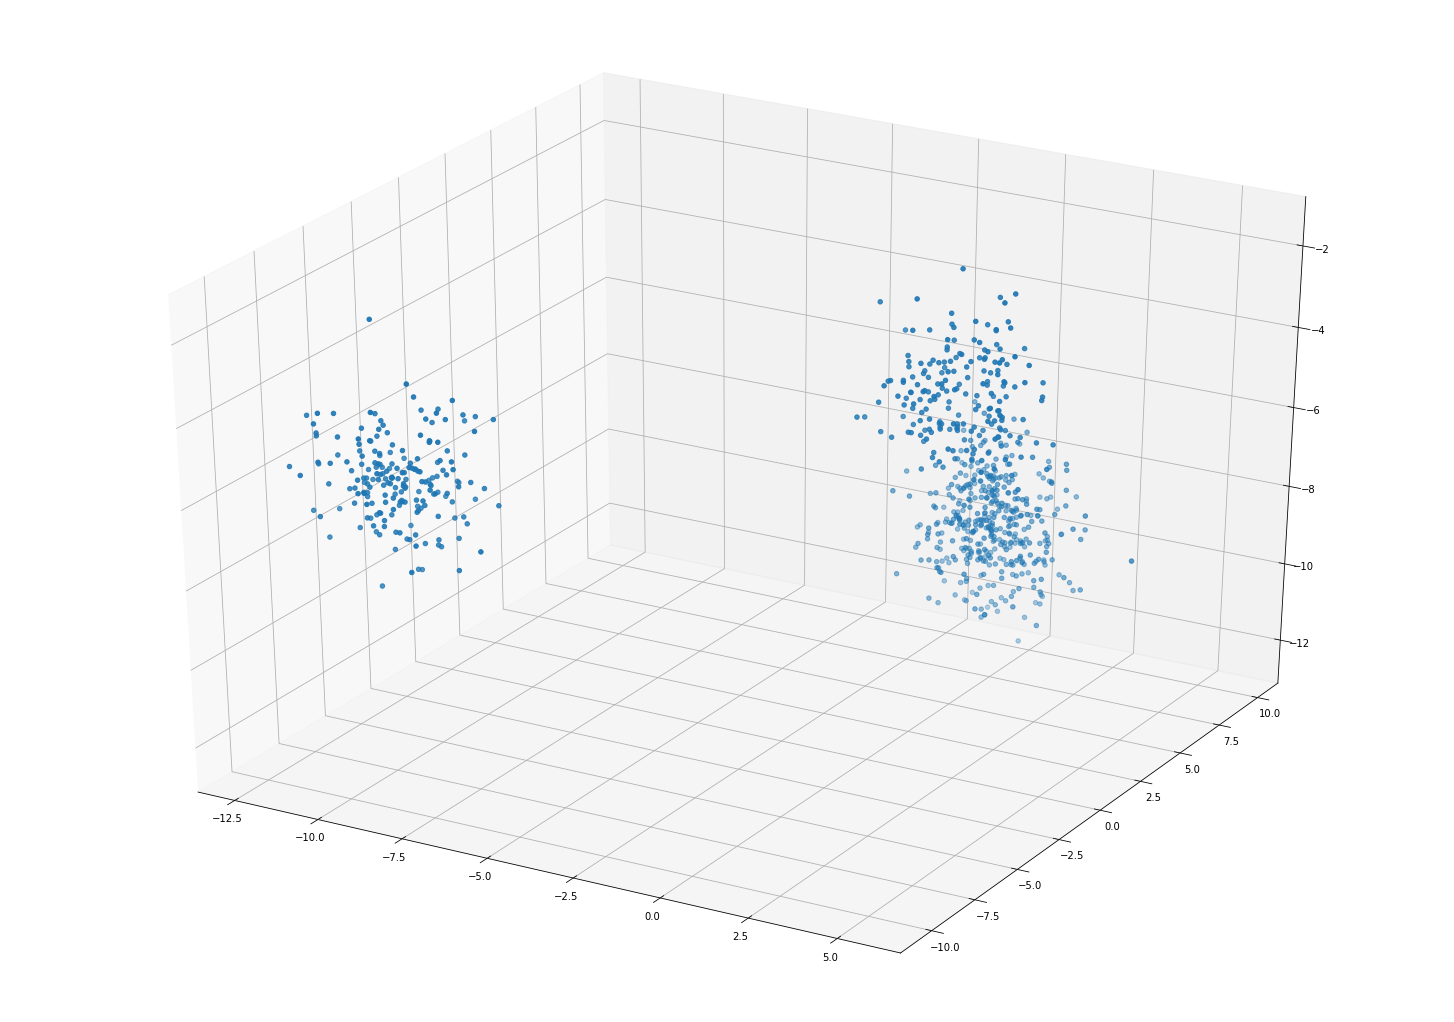

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

### 4 - Definindo o KMeans como método de clusterização

- Iniciar k centróides randômicos no dataset. k é um hiperparâmetro e indica quantos clusters estamos procurando;
- Calcular a distância de cada ponto em relação a cada um desses centroides;
- Calcular o ponto médio de cada um desses k clusters. Esse ponto médio será o novo centroide;
- Repetir o processo até que a variância se estabilize.

In [14]:
from sklearn.cluster import KMeans

# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

### 5 - Visualizando o resultado

Cluster  1
[-9.79651595 -7.23548061 -5.77438024]
Cluster  2
[ 0.92218378  5.56977679 -8.58080158]
Cluster  3
[ 1.38179538  2.41671711 -4.36559909]
Cluster  4
[-0.14989922  7.76879918 -9.16754574]


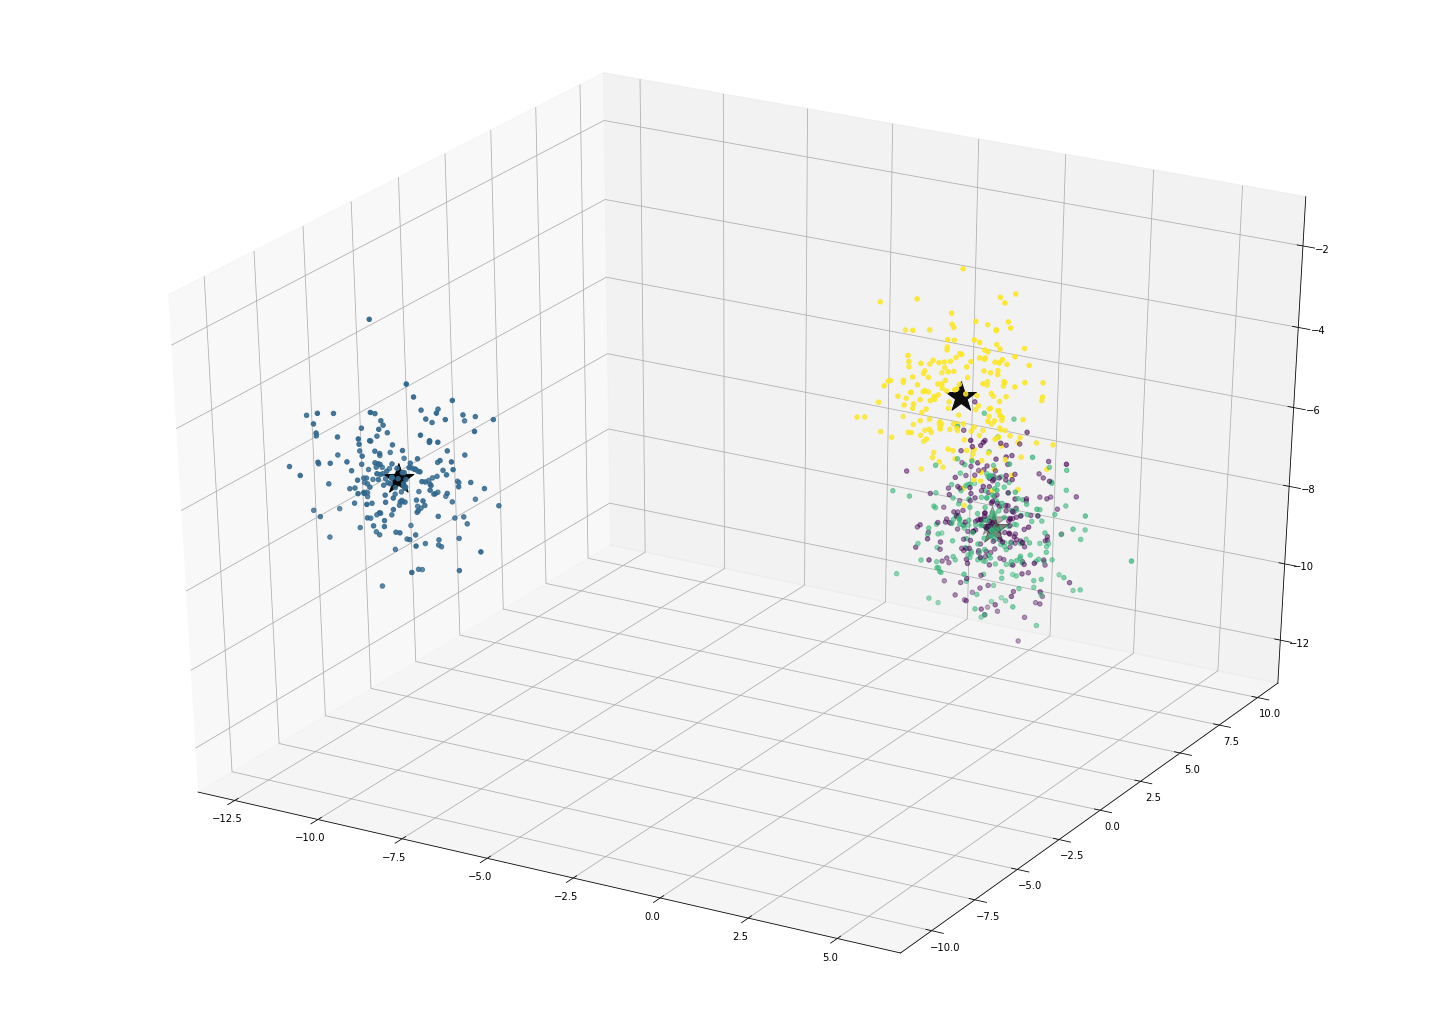

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
counter = 1
for cluster in C:
    print('Cluster ',counter)
    print(cluster)
    counter += 1

__O resultado é o esperado. Os quatro clusters estão definidos.__
<br>
Quando não se sabe quantos clusters existem ou estão interpolados, deve-se usar o método __Elbow__. São construídos diversos K-Means com K dentro de um range, e plotadas sua inércia-variância. Numa análise intuitiva, caso escolhemos 1 centroide, a variância será máxima, enquanto que com k = n_samples, a variância será 0.


### 6 - Usando o Método Elbow para identificar quantos clusters e escolher o k

1 48556.46930425288
2 8137.339681503631
3 2839.660468484102
4 2223.5171544596083
5 2057.9701821524523
6 1915.4117348944906
7 1768.738944430551
8 1637.1751431944658
9 1525.4801269327681
10 1420.7761609983068


Text(0, 0.5, 'WSS')

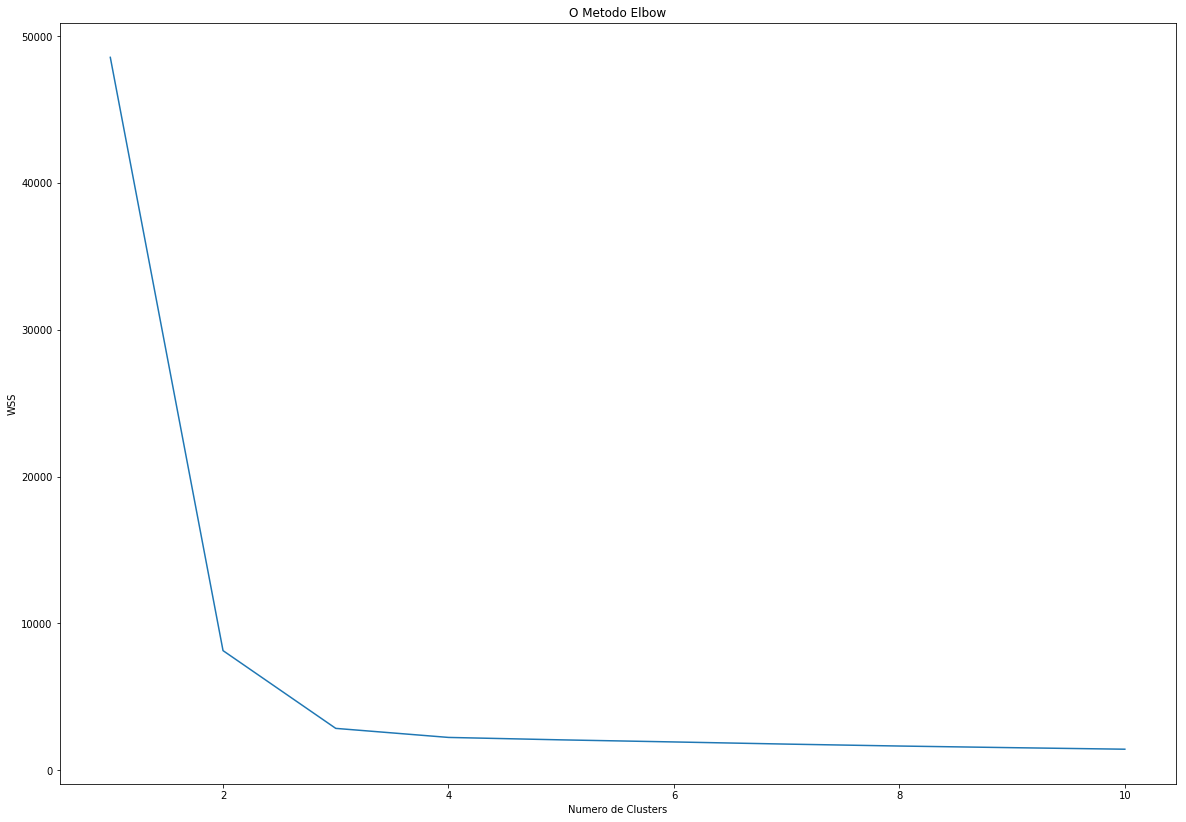

In [11]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares

Neste exemplo, a saturação ocorre quando k=3, e esse seria a melhor escolha.